In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel ("D:\IMDB Movie Database.xlsx")
print (df)

         id    imdb_id  popularity     budget    revenue  \
0    131634  tt1951266    5.476958  160000000  650523427   
1    158852  tt1964418    5.462138  190000000  209035668   
2    307081  tt1798684    5.337064   30000000   91709827   
3    254128  tt2126355    4.907832  110000000  470490832   
4    216015  tt2322441    4.710402   40000000  569651467   
..      ...        ...         ...        ...        ...   
105   10823  tt0087050    0.361782     800000   14000000   
106   15927  tt0087892    0.329484    8000000   27187653   
107   14746  tt0088194    0.297597   14500000    8089290   
108   24128  tt0088178    0.283191    1200000    4978922   
109   11221  tt0086955    0.174241   18000000   19265302   

                            original_title  \
0    The Hunger Games: Mockingjay - Part 2   
1                             Tomorrowland   
2                                 Southpaw   
3                              San Andreas   
4                     Fifty Shades of Grey   
.. 

In [3]:
df.shape

(110, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    110 non-null    int64  
 1   imdb_id               110 non-null    object 
 2   popularity            110 non-null    float64
 3   budget                110 non-null    int64  
 4   revenue               110 non-null    int64  
 5   original_title        110 non-null    object 
 6   cast                  110 non-null    object 
 7   homepage              62 non-null     object 
 8   director              110 non-null    object 
 9   tagline               108 non-null    object 
 10  keywords              110 non-null    object 
 11  overview              110 non-null    object 
 12  runtime               110 non-null    int64  
 13  genres                110 non-null    object 
 14  production_companies  110 non-null    object 
 15  release_date          1

In [5]:
df.duplicated().sum()

0

In [6]:
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,61.000000,61.000000,6.100000e+01,6.100000e+01,61.000000,61.000000,61.000000,61.000000,6.100000e+01,6.100000e+01
mean,50884.344262,4.296302,8.699590e+07,4.099920e+08,118.426230,2345.557377,6.755738,2007.163934,9.162203e+07,4.475815e+08
std,74765.672283,2.817659,6.083034e+07,2.995112e+08,23.356269,1490.627145,0.768445,6.608531,5.998389e+07,3.362342e+08
min,12.000000,1.212565,0.000000e+00,0.000000e+00,78.000000,74.000000,4.700000,1977.000000,0.000000e+00,0.000000e+00
25%,603.000000,2.623143,4.000000e+07,1.704329e+08,101.000000,1265.000000,6.300000,2002.000000,4.000463e+07,1.712143e+08
50%,13179.000000,3.326646,7.500000e+07,3.191310e+08,114.000000,1920.000000,6.700000,2009.000000,8.247033e+07,3.725564e+08
75%,72105.000000,5.462138,1.250000e+08,6.550112e+08,130.000000,3220.000000,7.300000,2012.000000,1.454097e+08,6.671677e+08
max,318846.000000,12.971027,2.500000e+08,9.764756e+08,189.000000,6351.000000,8.100000,2015.000000,2.541001e+08,1.209981e+09


In [8]:
index_err = df.query('runtime == 0 or budget == 0 or revenue == 0').index
df.drop(index_err, axis=0, inplace=True)

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,58.000000,58.000000,5.800000e+01,5.800000e+01,58.000000,58.000000,58.000000,58.000000,5.800000e+01,5.800000e+01
mean,52149.241379,4.433048,9.032328e+07,4.311985e+08,119.672414,2452.603448,6.789655,2007.051724,9.517811e+07,4.707322e+08
std,76439.245127,2.822614,6.037896e+07,2.917598e+08,23.047920,1448.957108,0.743791,6.757510,5.920179e+07,3.285036e+08
min,12.000000,1.212565,2.500000e+05,1.202127e+07,81.000000,227.000000,4.700000,1977.000000,3.396151e+05,1.633042e+07
25%,589.500000,2.664421,4.050000e+07,1.804428e+08,102.250000,1339.750000,6.300000,2002.000000,4.536870e+07,1.936402e+08
50%,10887.000000,3.449028,7.950000e+07,3.390912e+08,116.000000,2165.000000,6.700000,2009.000000,8.427860e+07,4.051474e+08
75%,74861.250000,5.473253,1.287500e+08,6.630220e+08,131.500000,3413.500000,7.300000,2012.000000,1.467524e+08,6.863565e+08
max,318846.000000,12.971027,2.500000e+08,9.764756e+08,189.000000,6351.000000,8.100000,2015.000000,2.541001e+08,1.209981e+09


In [9]:
df.revenue.describe()

count    5.800000e+01
mean     4.311985e+08
std      2.917598e+08
min      1.202127e+07
25%      1.804428e+08
50%      3.390912e+08
75%      6.630220e+08
max      9.764756e+08
Name: revenue, dtype: float64

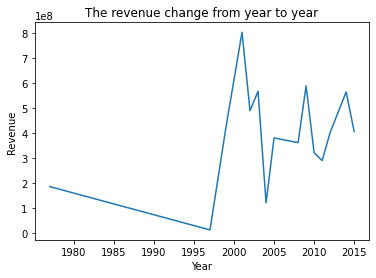

In [10]:
revenues = df.groupby('release_year')['revenue'].mean()

plt.plot(revenues)
plt.title('The revenue change from year to year')
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.show()

<AxesSubplot:>

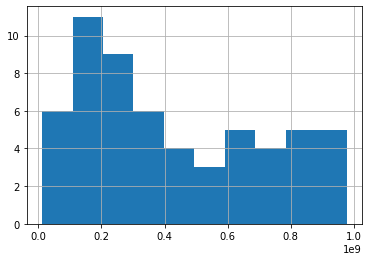

In [11]:
df.revenue.hist()

In [12]:
bin_edges = [1960, 1970, 1980, 1990, 2000, 2010, 2015]
bin_names = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
df['decade'] = pd.cut(df['release_year'], bin_edges, labels=bin_names)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade
0,131634,tt1951266,5.476958,160000000,650523427,The Hunger Games: Mockingjay - Part 2,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,http://www.thehungergames.movie/,Francis Lawrence,The fire will burn forever.,...,136,War|Adventure|Science Fiction,Studio Babelsberg|StudioCanal|Lionsgate|Walt D...,2015-11-18 00:00:00,2380,6.5,2015,1.471999e+08,598481289.5,2010s
1,158852,tt1964418,5.462138,190000000,209035668,Tomorrowland,Britt Robertson|George Clooney|Raffey Cassidy|...,http://movies.disney.com/tomorrowland,Brad Bird,Imagine a world where nothing is impossible.,...,130,Action|Family|Science Fiction|Adventure|Mystery,Walt Disney Pictures|Babieka|A113,2015-05-19 00:00:00,1899,6.2,2015,1.747999e+08,192312729.9,2010s
3,254128,tt2126355,4.907832,110000000,470490832,San Andreas,Dwayne Johnson|Alexandra Daddario|Carla Gugino...,http://www.sanandreasmovie.com/,Brad Peyton,"A rescue pilot survived an earthquake, this is...",...,114,Action|Drama|Thriller,New Line Cinema|Village Roadshow Pictures|Warn...,2015-05-27 00:00:00,2060,6.1,2015,1.012000e+08,432851375.0,2010s
4,216015,tt2322441,4.710402,40000000,569651467,Fifty Shades of Grey,Dakota Johnson|Jamie Dornan|Jennifer Ehle|Eloi...,https://www.facebook.com/fiftyshadesofgreymovie,Sam Taylor-Johnson,Are you curious?,...,125,Drama|Romance,Focus Features|Trigger Street Productions|Mich...,2015-02-11 00:00:00,1865,5.3,2015,3.679998e+07,524079119.0,2010s
5,318846,tt1596363,4.648046,28000000,133346506,The Big Short,Christian Bale|Steve Carell|Ryan Gosling|Brad ...,http://www.thebigshortmovie.com/,Adam McKay,This is a true story.,...,130,Comedy|Drama,Paramount Pictures|Plan B Entertainment|Regenc...,2015-12-11 00:00:00,1545,7.3,2015,2.575999e+07,122678731.5,2010s


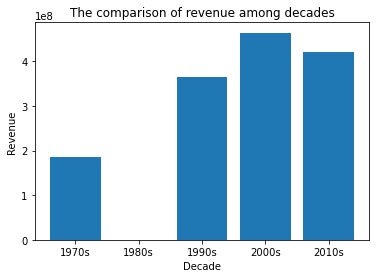

In [13]:
rev_dis = df.groupby('decade').revenue.mean()

plt.bar(rev_dis.index, rev_dis.values)
plt.title('The comparison of revenue among decades')
plt.xlabel('Decade')
plt.ylabel('Revenue')

plt.show()

release_year
2010    5
2011    5
2012    6
2014    6
2015    5
Name: id, dtype: int64


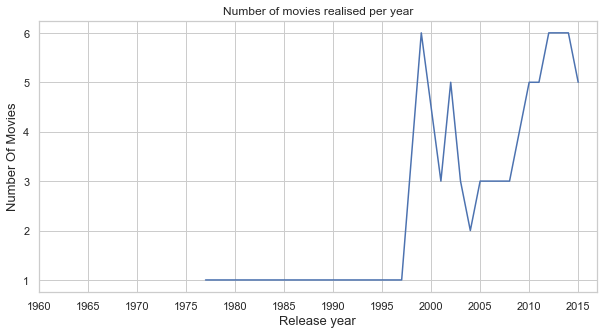

In [18]:
data=df.groupby('release_year').count()['id']
print(data.tail())
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Number of movies realised per year",fontsize = 12)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
sns.set_style("whitegrid")

In [19]:
high_revenue = df.revenue.quantile(.75)
high_rev_df = df[df.revenue > high_revenue]
high_rev_df.revenue.describe()

count    1.500000e+01
mean     8.375667e+08
std      1.014920e+08
min      6.656923e+08
25%      7.417215e+08
50%      8.646260e+08
75%      9.253025e+08
max      9.764756e+08
Name: revenue, dtype: float64

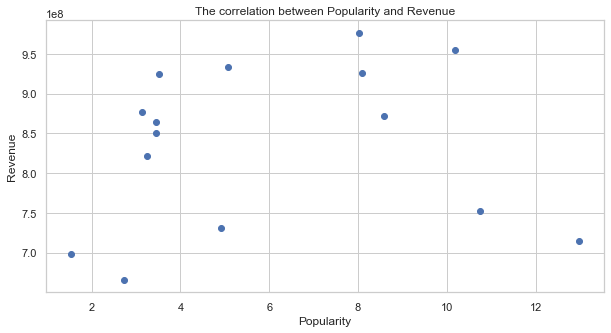

In [20]:
plt.scatter(x=high_rev_df.popularity, y=high_rev_df.revenue)
plt.title('The correlation between Popularity and Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

plt.show()

In [21]:
high_rev_df[['popularity', 'revenue']].corr()

,popularity,revenue
popularity,1.000000,0.122176
revenue,0.122176,1.000000


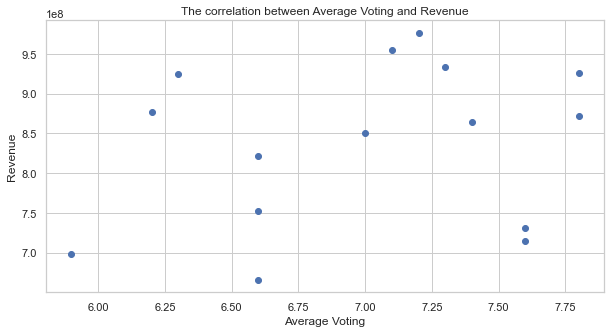

In [22]:
plt.scatter(x=high_rev_df.vote_average, y=high_rev_df.revenue)
plt.title('The correlation between Average Voting and Revenue')
plt.xlabel('Average Voting')
plt.ylabel('Revenue')

plt.show()

In [23]:
high_rev_df[['vote_average', 'revenue']].corr()

,vote_average,revenue
vote_average,1.000000,0.244016
revenue,0.244016,1.000000


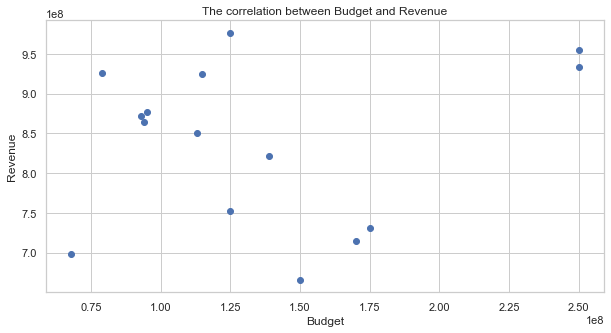

In [24]:
plt.scatter(x=high_rev_df.budget, y=high_rev_df.revenue)
plt.title('The correlation between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')

plt.show()

In [25]:
high_rev_df[['budget', 'revenue']].corr()

,budget,revenue
budget,1.000000,0.140619
revenue,0.140619,1.000000


In [26]:
df_genres = df[['release_year', 'genres', 'popularity']]
df_genres.head()

,release_year,genres,popularity
0,2015,War|Adventure|Science Fiction,5.476958
1,2015,Action|Family|Science Fiction|Adventure|Mystery,5.462138
3,2015,Action|Drama|Thriller,4.907832
4,2015,Drama|Romance,4.710402
5,2015,Comedy|Drama,4.648046


In [27]:
from itertools import chain

def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))
lens = df_genres['genres'].str.split('|').map(len)

df_genres = pd.DataFrame({'release_year': np.repeat(df_genres['release_year'], lens),                       
                          'genres': chainer(df_genres['genres']),
                          'popularity': np.repeat(df_genres['popularity'], lens)})

df_genres.head()

,release_year,genres,popularity
0,2015,War,5.476958
0,2015,Adventure,5.476958
0,2015,Science Fiction,5.476958
1,2015,Action,5.462138
1,2015,Family,5.462138


In [28]:
def func(group):
    return group.loc[group['popularity'] == group['popularity'].max()]

df_pop = df_genres.groupby(['release_year', 'genres'], as_index=False).mean()

df_most_pop = df_pop.groupby('release_year', as_index=False).apply(func).reset_index(drop=True)
df_most_pop.head()

,release_year,genres,popularity
0,1977,Action,2.379469
1,1977,Adventure,2.379469
2,1977,Thriller,2.379469
3,1997,Comedy,1.212565
4,1997,Drama,1.212565


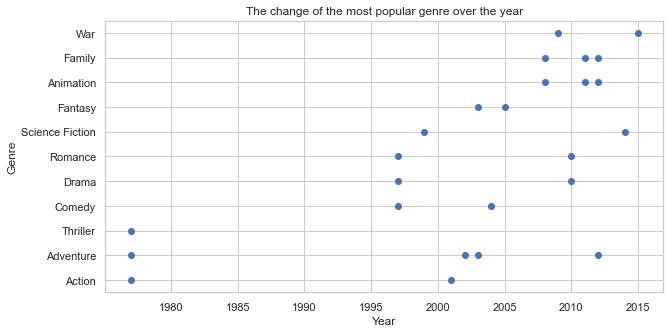

In [29]:
plt.scatter(df_most_pop.release_year, df_most_pop.genres)
plt.title('The change of the most popular genre over the year')
plt.xlabel('Year')
plt.ylabel('Genre')

plt.show()

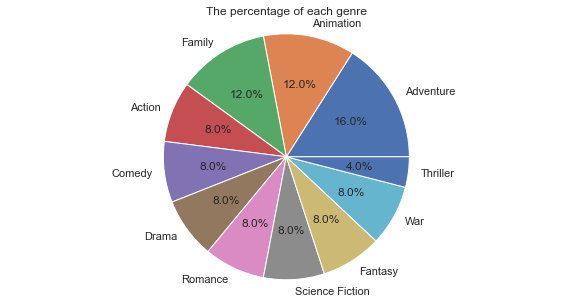

In [30]:
sizes = df_most_pop.genres.value_counts().values
labels = df_most_pop.genres.value_counts().index

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('The percentage of each genre')

plt.show()

In [32]:
df['Profit'] = df['revenue'] - df['budget']

In [34]:
info = pd.DataFrame(df['Profit'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['Profit'][:10])

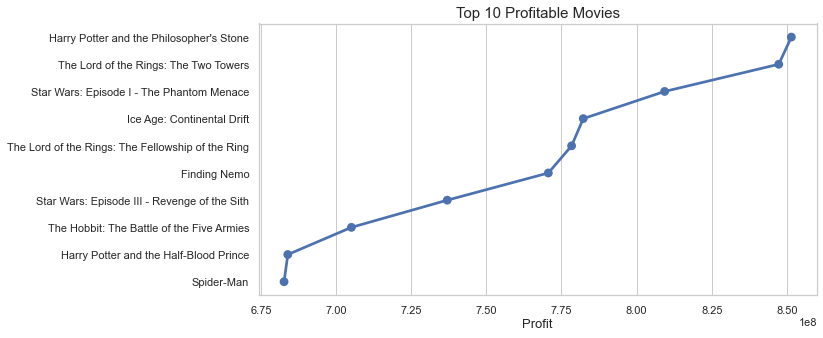

In [36]:
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")


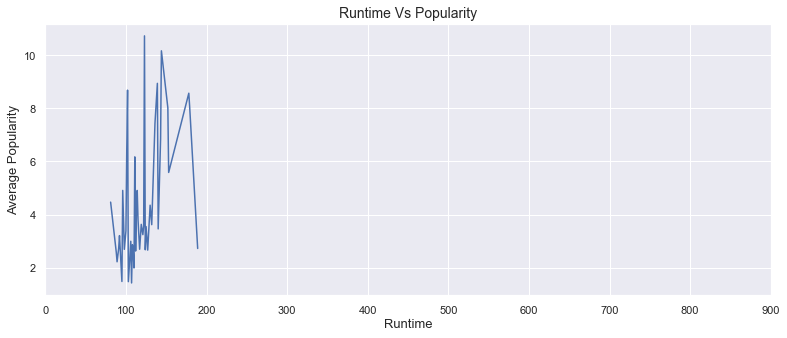

In [37]:
df.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))

#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")